<a href="https://colab.research.google.com/github/raviatkumar/Face_Mask_Detection_Project/blob/main/Face_Mask_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Face-Mask-Detection**

##**Problem Description**


In the current global landscape, the COVID-19 pandemic has necessitated widespread lockdowns and heightened safety measures, making face mask usage a mandatory practice for individuals venturing outdoors. Recognizing the importance of this precautionary measure, the deployment of Deep Learning models for face mask detection has emerged as a significant and timely trend. The objective is to develop systems capable of discerning whether individuals are wearing masks, a crucial aspect in maintaining public health and safety protocols.

However, despite the increasing demand for face mask detection applications, there is a notable challenge stemming from the scarcity of comprehensive datasets containing a significant number of 'with_mask' images. This scarcity poses a hindrance to the development of robust and accurate models, particularly as large-scale datasets are pivotal in training Deep Learning algorithms effectively. The shortage of diverse and ample 'with_mask' images complicates the task of creating a robust model capable of accurately distinguishing between faces with and without masks.

This shortage of labeled data has particularly impacted various sectors, including transportation services, densely populated urban areas, residential districts, and large-scale manufacturing enterprises, where the need for automated face mask detection is critical. The absence of a substantial dataset for 'with_mask' instances hampers the development and deployment of efficient and reliable face mask detection systems, thus impeding the broader implementation of safety measures.

In light of these challenges, the development of an accurate and efficient face mask detection model becomes imperative to address the pressing demands of the ongoing pandemic. The model you have created, trained on a dataset of 7553 images with 3 color channels (RGB), represents a commendable effort in tackling this issue. As the world continues to grapple with the complexities of the COVID-19 outbreak, advancements in Deep Learning for face mask detection stand out as a pivotal contribution towards enhancing public safety and adhering to the new norms established in response to the global health crisis.

**Import necessary libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Define the path to the dataset**

In [ ]:
# Path to the directory containing the "without mask" and "with mask" folders
data_path = "/content/drive/MyDrive/Interview question solved/Project/Deep Learning dataset/deep learning/data"

**Define subfolders for images with and without masks**

In [ ]:
# Subfolders
without_mask_path = os.path.join(data_path, "without_mask")
with_mask_path = os.path.join(data_path, "with_mask")

**Function to load images from a folder**

In [ ]:
# Function to load images from a folder
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            images.append(image)
    return images

In [ ]:
# Load images from "without_mask" folder
without_mask_images = load_images(without_mask_path)

# Load images from "with_mask" folder
with_mask_images = load_images(with_mask_path)

In [ ]:
# Print the number of images in each category
print("Number of images without mask:", len(without_mask_images))
print("Number of images with mask:", len(with_mask_images))

Number of images without mask: 3828
Number of images with mask: 3725


In [ ]:
# create the labels
mask_files = [1]*3725
nomask_files = [0]*3828

In [ ]:
print(mask_files[0:5]),print(nomask_files[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


(None, None)

In [ ]:
print(len(mask_files)),print(len(nomask_files))

3725
3828


(None, None)

In [ ]:
labels = mask_files + nomask_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


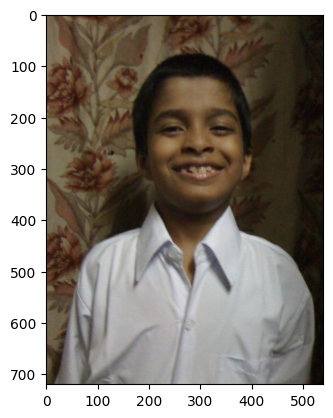

In [ ]:
# display with without mask image
image = mpimg.imread('/content/drive/MyDrive/Interview question solved/Project/Deep Learning dataset/deep learning/data/without_mask/without_mask_999.jpg')
imgplot = plt.imshow(image)
plt.show()

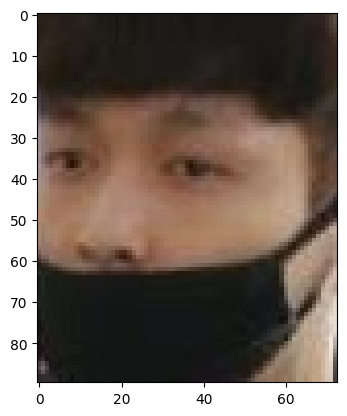

In [ ]:
# display with without mask image
image = mpimg.imread('/content/drive/MyDrive/Interview question solved/Project/Deep Learning dataset/deep learning/data/with_mask/with_mask_998.jpg')
imgplot = plt.imshow(image)
plt.show()

**Image Processing**

In [ ]:
with_mask_path = '/content/drive/MyDrive/Interview question solved/Project/Deep Learning dataset/deep learning/data/with_mask/'
mask_files = os.listdir(with_mask_path)

data = []

for img_file in mask_files:

  image = Image.open(with_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/drive/MyDrive/Interview question solved/Project/Deep Learning dataset/deep learning/data/without_mask/'
nomask_files = os.listdir(without_mask_path)

for img_file in nomask_files:

  image = Image.open(without_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data[0]

array([[[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [35, 35, 35]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [35, 35, 35]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [35, 35, 35]],

       ...,

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [34, 34, 34]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [34, 34, 34]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [34, 34, 34]]], dtype=uint8)

In [ ]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

**Split the data into training and testing sets**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


**Scale the pixel values to the range [0, 1]**

In [ ]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train[0],x_train_scaled[0]

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 18,  18,  18],
         [ 15,  15,  15],
         [ 17,  17,  17],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 18,  18,  18],
         [ 14,  14,  14],
         [ 15,  15,  15],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 19,  19,  19],
         [ 17,  17,  17],
         [ 18,  18,  18],
         ...,
         [255, 255, 255],
  

**Build the convolutional neural network model using TensorFlow and Keras**

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 149s 863ms/step - loss: 0.4145 - acc: 0.8172 - val_loss: 0.2725 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 143s 839ms/step - loss: 0.2784 - acc: 0.8884 - val_loss: 0.2153 - val_acc: 0.9140
Epoch 3/5
170/170 [==============================] - 151s 887ms/step - loss: 0.2271 - acc: 0.9088 - val_loss: 0.2110 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 159s 940ms/step - loss: 0.1899 - acc: 0.9233 - val_loss: 0.2156 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 142s 831ms/step - loss: 0.1664 - acc: 0.9382 - val_loss: 0.2390 - val_acc: 0.9157


**Evaluate the model on the test set**

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

# Predictions on the test set
y_pred_probs = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

48/48 [==============================] - 13s 269ms/step - loss: 0.2125 - acc: 0.9239
Test Accuracy = 0.9238914847373962
48/48 [==============================] - 11s 234ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       750
           1       0.93      0.91      0.92       761

    accuracy                           0.92      1511
   macro avg       0.92      0.92      0.92      1511
weighted avg       0.92      0.92      0.92      1511


Confusion Matrix:
 [[700  50]
 [ 65 696]]


**Plot the training history**

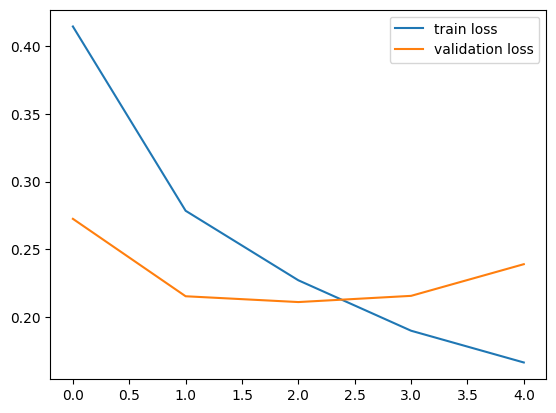

In [ ]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

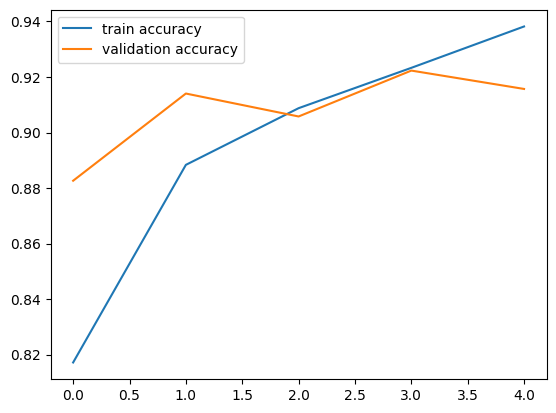

In [ ]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

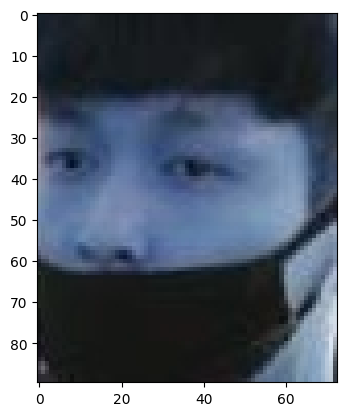

In [ ]:
# input_image_path = input('Path of the image to be predicted:
input_image_path = '/content/drive/MyDrive/Interview question solved/Project/Deep Learning dataset/deep learning/data/with_mask/with_mask_998.jpg'
input_image = cv2.imread(input_image_path)
imgplot = plt.imshow(input_image)
plt.show()

In [ ]:
# Resize and preprocess the input image
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

In [ ]:
# Resize and preprocess the input image
input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

1/1 [==============================] - 0s 185ms/step
1


In [ ]:
# Resize and preprocess the input image
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

The person in the image is wearing a mask
